In [1]:
import rasterio
from skimage.exposure import match_histograms

In [2]:
sar_path = "D:/Personal_Projects/Geospatial/Building_Detection/data/spacenet_data/SN6_buildings_AOI_11_Rotterdam_test_public/test_public/AOI_11_Rotterdam/SAR-Intensity/SN6_Test_Public_AOI_11_Rotterdam_SAR-Intensity_20190804111224_20190804111453_tile_8697.tif"
dop_path = "Z:/BuildingDetection/dop_Resample/dop10rgbi_32_280_5652_1_nw_2023.tiff"

In [3]:
# Load SpaceNet 6 SAR-Intensity image (test data)
with rasterio.open(sar_path) as src:
    spacenet_ref = src.read()  # Shape: (bands, height, width)
    spacenet_meta = src.meta

# Load DOP image
with rasterio.open(dop_path) as src:
    dop_image = src.read()
    dop_meta = src.meta

In [4]:
#  Match Histograms - lign the DOP’s RGB bands with the reference
# Match DOP to SpaceNet reference (per band)
matched_image = match_histograms(
    dop_image.transpose(1, 2, 0),  # Reshape to (height, width, bands)
    spacenet_ref.transpose(1, 2, 0),
    channel_axis=-1
).transpose(2, 0, 1)  # Reshape back to (bands, height, width)

In [5]:
# Save the Radiometrically Aligned DOP:
with rasterio.open("dop10rgb1_32_280_5652_1_nw_2023_matched.tiff", "w", **dop_meta) as dst:
    dst.write(matched_image)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..76.80874].


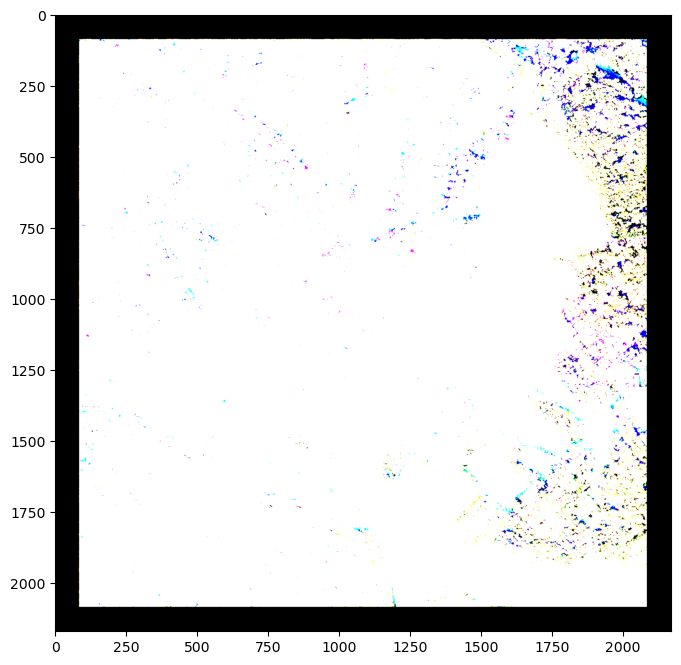

In [14]:
tiff_path ="dop10rgb1_32_280_5652_1_nw_2023_matched.tiff"
#tiff_path ="matched_sar_image.tif"
with rasterio.open(tiff_path) as src:
   # Read the first three bands (e.g., for RGB visualization)
    red = src.read(1)
    green = src.read(2)
    blue = src.read(3)
    
    # Stack them into an RGB image
    rgb_image = np.dstack((red, green, blue))

    # Plot the RGB image
    plt.figure(figsize=(10, 8))
    plt.imshow(rgb_image)
    #plt.title("RGB Visualization of TIFF Image")
    #plt.xlabel("X Coordinate")
    #plt.ylabel("Y Coordinate")
    plt.show()

### Validation:
#### Open the matched image in QGIS and compare it visually with the SpaceNet reference.

#### Check histograms using skimage.exposure.plot_hist to ensure alignment: